In [ ]:
### If running this on Google Colab, uncomment and run the following lines:
#!pip install netin
#!wget -nc https://raw.githubusercontent.com/snma-tutorial/www2023/main/exercises/helper.py
#!mkdir plots

# Exercise \#4

Ranking inequalities

## Dependencies

In [1]:
from netin import *
from netin import viz
from netin import stats

/opt/anaconda3/envs/snma/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Helpers

In [2]:
%load_ext autoreload
%autoreload 2

import helper

``` python
# Returns some metadata for each node in a graph as a DataFrame
Graph.get_node_metadata_as_dataframe(self, 
                                     include_graph_metadata=False, 
                                     n_jobs=1) -> pd.DataFrame
```

``` python
# Plots the edge type counts of a single or a list of graphs
helper.plot_edge_type_counts(data: Graph | list[Graph] | set[Graph], **kwargs)
```

``` python
# Updates the name of a graph (by default it is the model name)
helper.update_name_homophily(data: Graph | pd.DataFrame) -> str
```

``` python
# Plots the probability density function
viz.plot_powerlaw_fit(data: pd.DataFrame | list[pd.DataFrame], 
                      col_name: str | list[str], 
                      kind: str,
                      fn: str = None, 
                      **kwargs)
```

``` python
# Plots the inequity of a rank distribution
viz.plot_fraction_of_minority(data: pd.DataFrame | List[pd.DataFrame], 
                              col_name: str | List,
                              fn: str = None, 
                              **kwargs):
```

``` python 
# Plots the inequality of a rank distribution
viz.plot_gini_coefficient(data: pd.DataFrame | List[pd.DataFrame], 
                          col_name: str | List,
                          fn: str = None, 
                          **kwargs):
```

``` python
# Plots the disparity (inequity vs. inequality) of a rank distribution
viz.plot_disparity(data: pd.DataFrame | List[pd.DataFrame], 
                   col_name: str | List, 
                   fn: str = None, 
                   **kwargs):
```

# Directed graphs

## Comparing the effect of homophily in ranking by pagerank
- Create 9 `DPAH` graphs
- Make sure all of them have the same number of nodes `n`, edge density `d`, fraction of minority `f_m`, activities `plo_M=plo_m`, and random seed `seed`.
- Make sure they have different values of homophily `h_MM` and `h_mm` as follows:
- -  Graphs 1-3: `h_MM=0.1` and `h_mm \in {0.1, 0.5, 0.9}`
- -  Graphs 4-6: `h_MM=0.5` and `h_mm \in {0.1, 0.5, 0.9}`
- -  Graphs 7-9: `h_MM=0.9` and `h_mm \in {0.1, 0.5, 0.9}`
- Plot the edge-type counts
- Plot the probability density function of their `pagerank` distributions
- Plot the `inequality` of the `pagerank`
- Plot the `inequity` of the `pagerank`
- Plot the `disparity` of the `pagerank`

### Bonus: Comparing the effect of preferential attachment and homophily in ranking by pagerank
- Generate 3 directed graphs; one for each model: `DPA`, `DH`, and `DPAH`
- Make sure all of them have the same number of nodes `n`, edge density `d`, fraction of minority `f_m`, activities `plo_M=plo_m`, homophily `h_MM` and `h_mm`, and random seed `seed`, if applicable.

### Task 1. Generating graphs

In [3]:
### Fix some parameters to later compare the effects of homophily

n = 1000     # number of nodes
d = 0.003    # number of edges to attach to every source node
             # Hint: Remember that the final number of edges will be: e = d * n (n-1)
f_m = 0.1    # fraction of minority group
plo_M = 2.1  # powerlaw out_degree exponent of the majority group (activity)
plo_m = 2.1  # powerlaw out_degree exponent of the minority group (activity)
seed = 12345 # random seed (reproducibility)

In [4]:
### Graphs

homophily_values = [0.1, 0.5, 0.9]
graphs = []
metadata = []
for h_MM in homophily_values: # homophily within majority nodes
    for h_mm in homophily_values: # homophily within minority nodes

        # generating graph
        g = DPAH(n=n, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
        g.generate()
        
        # updating name to include homophily values
        g.set_model_name(helper.update_name_homophily(g)) 
        graphs.append(g)

        # generating node metadata dataframe
        df = g.get_node_metadata_as_dataframe(include_graph_metadata=True)
        metadata.append(df)


100%|██████████| 8/8 [00:01<00:00,  5.88it/s]


### Task 2. Getting to know the data

In [5]:
### Setting the look & feel

viz.reset_style()
viz.set_paper_style()

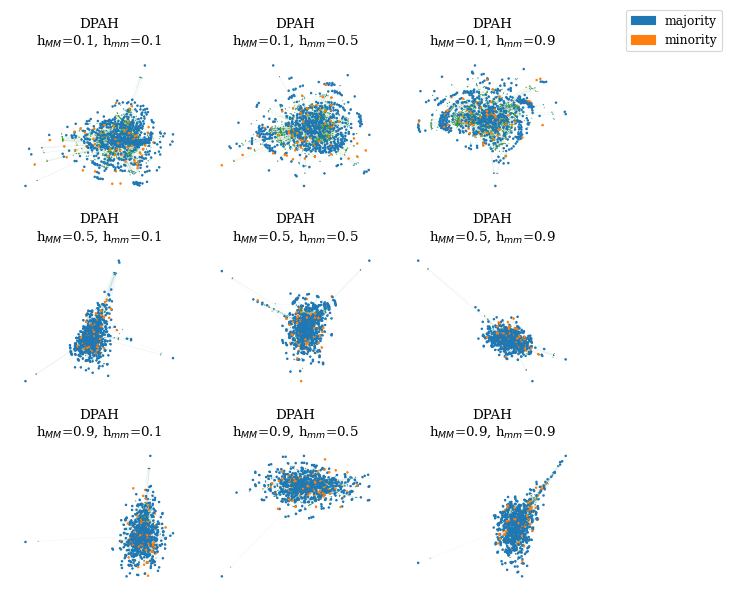

In [6]:
### Plotting al graphs at once
### Showing 3 graphs per row

viz.plot_graph(graphs, 
               nc = 3, 
               cell_size = 2.0,
               wspace = 0.1,
               ignore_singletons=True,
               fn = 'plots/4_all_graphs.pdf')

### Task 3. Plotting edge-type counts

plots/4_edge_counts.pdf saved.


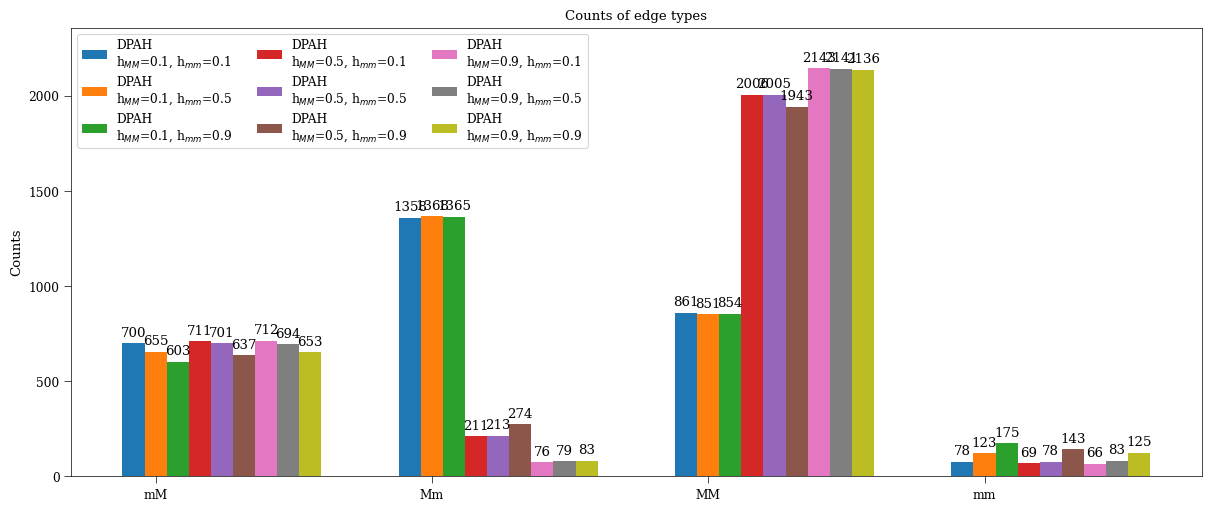

In [7]:
### Plot edge counts for each graph

helper.plot_edge_type_counts(graphs, 
                             figsize = (12,5),
                             width_bar = 0.08,
                             nc_legend = 3,
                             loc = 'best',
                             fn = 'plots/4_edge_counts.pdf')

### Task 4. Plotting PDFs

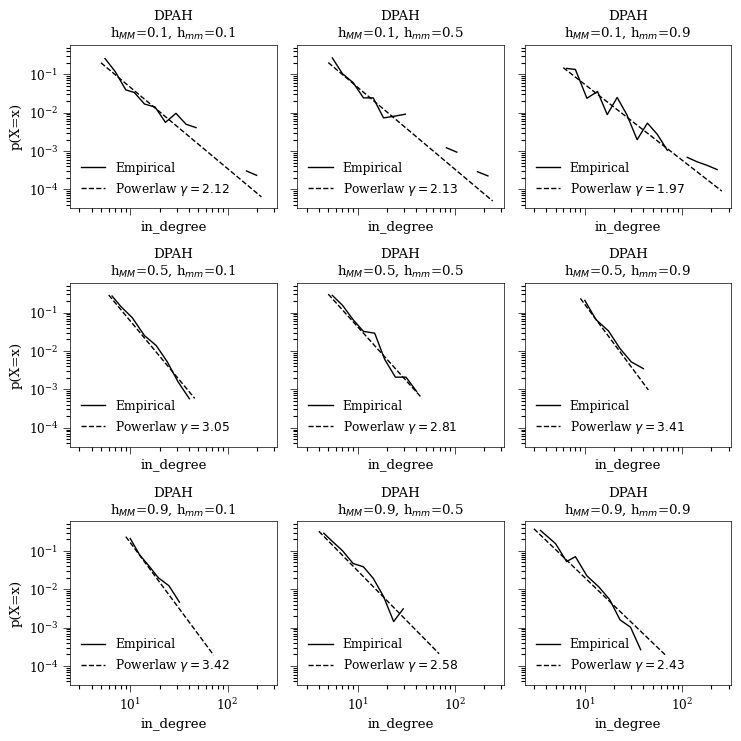

In [8]:
### Plot in_degree distribution of the whole graph
### Hint: Check out the dataframe. Which column has the in_degree of the node?

col_name = 'in_degree'
kind = 'pdf'

viz.plot_powerlaw_fit(data = metadata,
                      col_name = col_name,
                      kind = kind,
                      sharex = True, 
                      sharey = True,
                      cell_size = (2.5,2.5),
                      wspace = 0.1,
                      loc = 3,
                      nc = 3,
                      fn = f'plots/4_dpah_{col_name}.pdf')

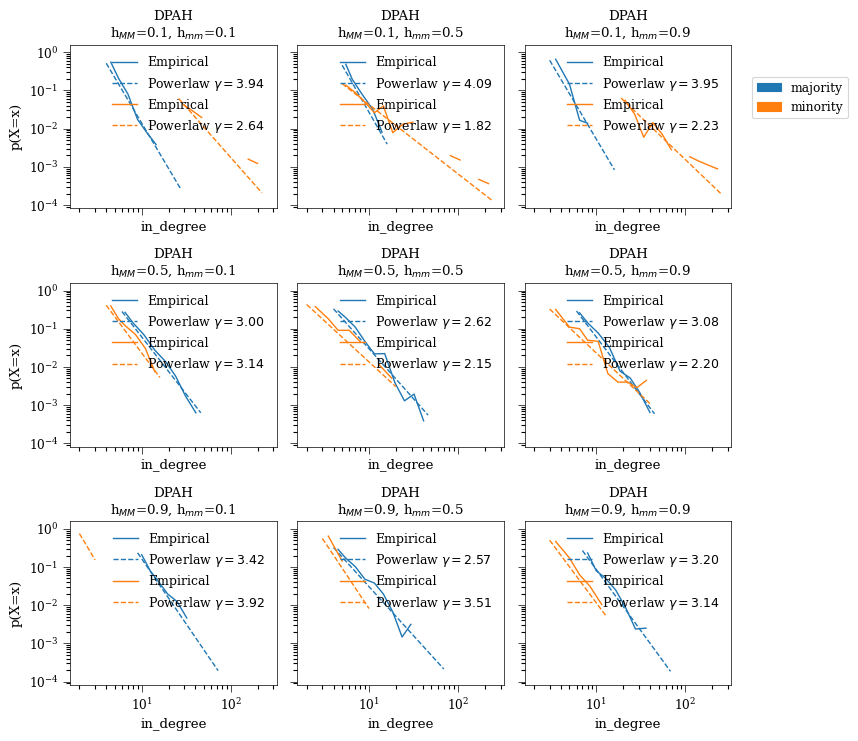

In [9]:
### Plot in_degree distribution of each group
### Hint: Check out the dataframe. Which column has the class of the node?
### M for majority, and m for minority.

hue = 'class_label'

viz.plot_powerlaw_fit(data = metadata,
                      col_name = col_name,
                      kind = kind,
                      hue = hue,
                      sharex = True, 
                      sharey = True,
                      cell_size = (2.5,2.5),
                      wspace = 0.1,
                      loc = 1,
                      nc = 3,
                      fontsize = 9,
                      fn = f'plots/4_dpah_{col_name}_groups.pdf')

### Task 5. Plot Inequity

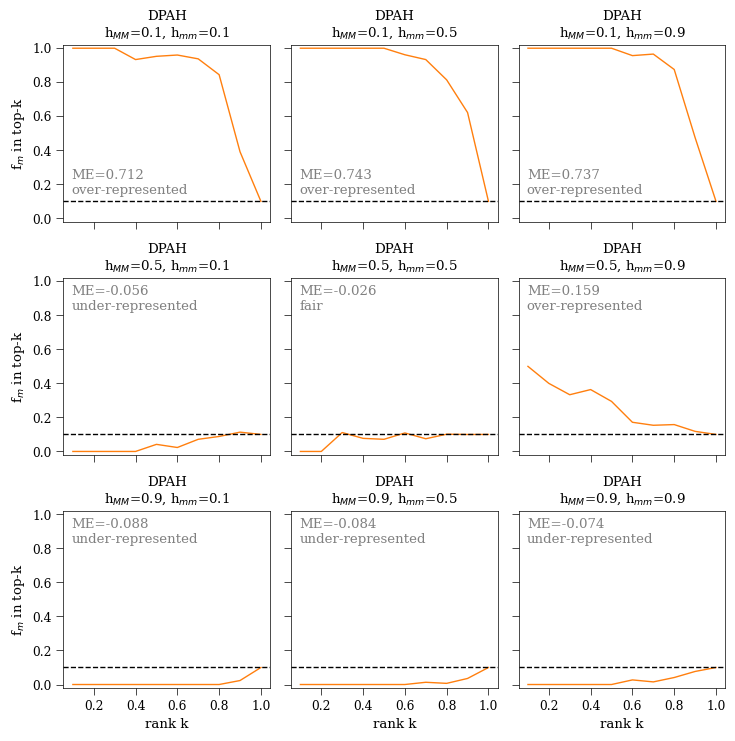

In [10]:
### Plot the inequity of the 'pagerank' distribution (ME: mean error)
### It shows the fraction of minoritiy nodes (y-axis) at each top-k rank (x-axis)
### Then, ME is computed as the difference between the fraction of minority nodes in each top-k 
### and the actual fraction of minorities.

viz.plot_fraction_of_minority(metadata, 
                              col_name=col_name, 
                              sharex=True, sharey=True,
                              cell_size = (2.5,2.5),
                              wspace = 0.1,
                              nc = 3,
                              fn = f'plots/4_dpah_{col_name}_inequality.pdf')

### Task 6. Plot Inequality

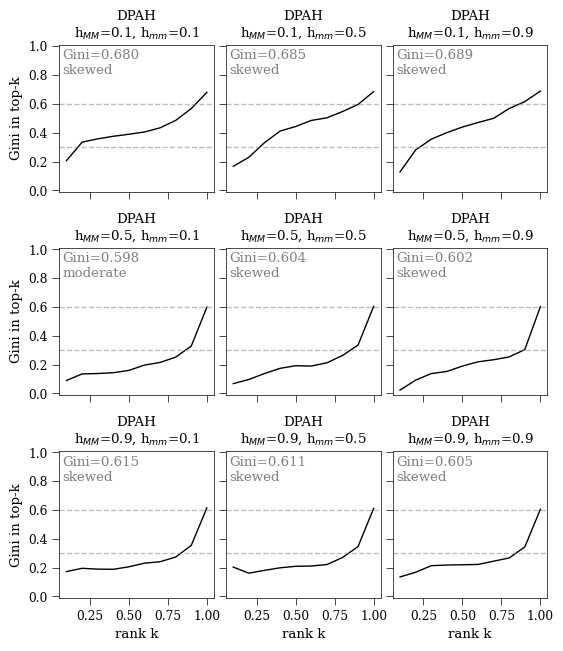

In [11]:
### Plot the inequality of the 'pagerank' distribution
### It shows the Gini coefficient in each top-k.
### Also, the global gini refers to the Gini at top-100% 

viz.plot_gini_coefficient(metadata, 
                          col_name = col_name, 
                          sharex = True, sharey = True,
                          nc = 3, 
                          wspace = 0.08, 
                          cell_size = (1.9,2.2),
                          fn = f'plots/4_dpah_{col_name}_inequity.pdf')

### Task 7. Plot Disparity

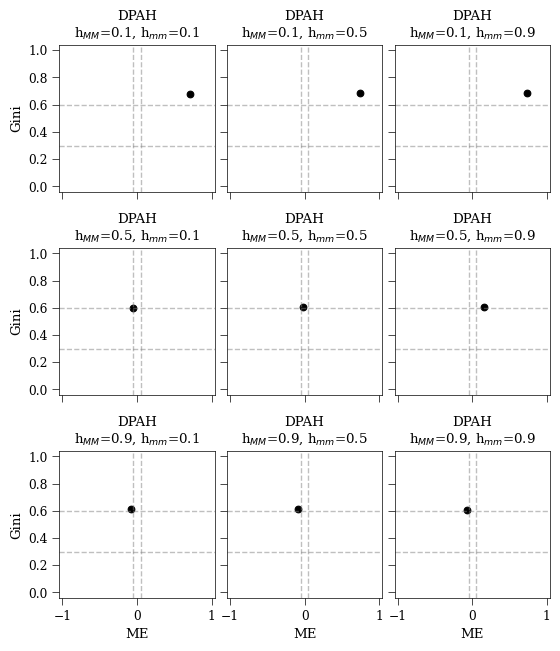

In [12]:
### Plot the disparity of the 'pagerank' distribution
### It shows the inequity (ME) vs. inequality (Gini)

viz.plot_disparity(metadata, 
                   col_name = col_name, 
                   sharex = True, sharey = True,
                   nc = 3, 
                   wspace = 0.08, 
                   cell_size = (1.9,2.2),
                   fn = f'plots/4_dpah_{col_name}_disparity.pdf')

# Bonus: Disentangling the effect of PA and H in ranking disparities

100%|██████████| 8/8 [00:01<00:00,  6.33it/s]


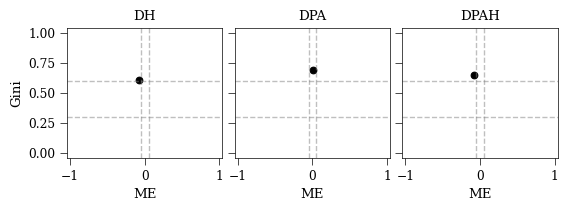

In [13]:
### Parameters
h_mm = 0.1
h_MM = 0.9

### Graphs
g_dpa = DPA(n=n, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, seed=seed)
g_dpa.generate()

g_dh = DH(n=n, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
g_dh.generate()

g_dpah = DPAH(n=n, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
g_dpah.generate()

### Get node metadata
metadata = [g_dh.get_node_metadata_as_dataframe(include_graph_metadata=True),
             g_dpa.get_node_metadata_as_dataframe(include_graph_metadata=True),
             g_dpah.get_node_metadata_as_dataframe(include_graph_metadata=True)]

### Visualize
viz.plot_disparity(metadata, 
                   col_name = 'pagerank', 
                   sharex = True, sharey = True,
                   nc = 3, 
                   wspace = 0.08, 
                   cell_size = (1.9,2.2),
                   fn = f'plots/4_dpa_dh_dpah_{col_name}_disparity.pdf')